In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers

In [ ]:
X=np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
    ],dtype=float)
Y=np.array([
    [0],
    [1],
    [1],
    [0]
    ],dtype=float)

In [ ]:
model = models.Sequential(
    [
        layers.Input(shape=(2,)),
        layers.Dense(4,activation='relu'),
        layers.Dense(1,activation='sigmoid')
    ])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
History=model.fit(X,Y,epochs=2000,verbose=1)

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7500 - loss: 0.8723
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7500 - loss: 0.8709
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7500 - loss: 0.8695
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7500 - loss: 0.8682
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7500 - loss: 0.8668
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7500 - loss: 0.8654
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7500 - loss: 0.8640
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7500 - loss: 0.8627
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7500 - loss: 0.8613
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7500 - loss: 0.8600
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7500 - loss: 0.8587
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0

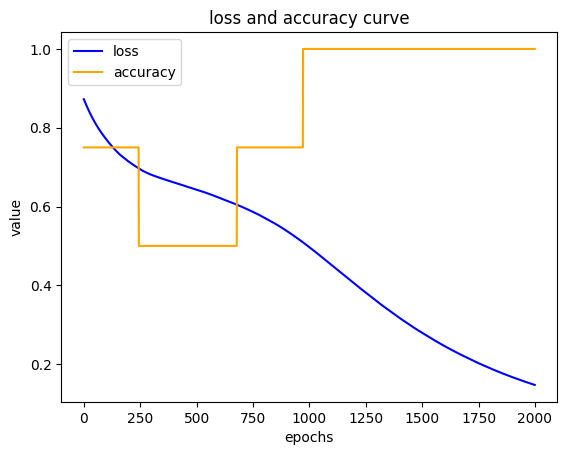

In [ ]:
# plot of loss and accuracy
plt.plot(History.history['loss'],color='blue',label='loss')
plt.plot(History.history['accuracy'],color='orange',label='accuracy')
plt.xlabel('epochs')
plt.ylabel('value')
plt.legend()
plt.title("loss and accuracy curve")
# plt.grid(True)
plt.show()

In [ ]:
output=model.predict(X)
binary_out = (output>0.5).astype(int)
accuracy = np.mean(binary_out.flatten()==Y.flatten().astype(int))
print(f"Accuracy:{accuracy*100:.2f}%")
print(f"input\t\t result:\tencoded")
for inp,out in zip(X,output):
  bin=np.where(out>0.5,1,0)
  # use only bin:.4f
  bin=1 if out>0.5 else 0
  print(f"{inp}:->\t {out[0]:.4f} \t{bin}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Accuracy:100.00%
input		 result:	encoded
[0. 0.]:->	 0.1603 	0
[0. 1.]:->	 0.8680 	1
[1. 0.]:->	 0.8716 	1
[1. 1.]:->	 0.1258 	0


In [ ]:
loss,accuracy = model.evaluate(X,Y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 1.0000 - loss: 0.1470
